In [1]:
import  os

In [2]:
import random

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import skimage

In [6]:
from skimage import transform

In [7]:
from skimage import data

In [8]:
import keras 

C:\Users\Gurudeo\Anaconda2\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [9]:
from keras.models import Sequential

In [10]:
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten,InputLayer

In [11]:
def load_data(data_dir):
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]
    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) if f.endswith(".ppm")]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    return images, labels
ROOT_PATH = "E:/Traffice signs"
train_data_dir = os.path.join(ROOT_PATH, "Belgium/Training/")
test_data_dir = os.path.join(ROOT_PATH, "Belgium/Testing/")



In [12]:
images_train,labels_train=load_data(train_data_dir)

In [13]:
images_test,labels_test=load_data(test_data_dir)

In [14]:
print("Unique Labels: {0}\nTotal Images: {1}".format(len(set(labels_train)), len(images_train)))

Unique Labels: 62
Total Images: 4575


In [15]:
def display_label_images(images, label):
    limit = 24  
    plt.figure(figsize=(15, 5))
    i = 1
    start = labels_train.index(label)
    end = start + labels_train.count(label)
    for image in images[start:end][:limit]:
        plt.subplot(3, 8, i)
        plt.axis('off')
        i += 1
        plt.imshow(image)
    plt.show()



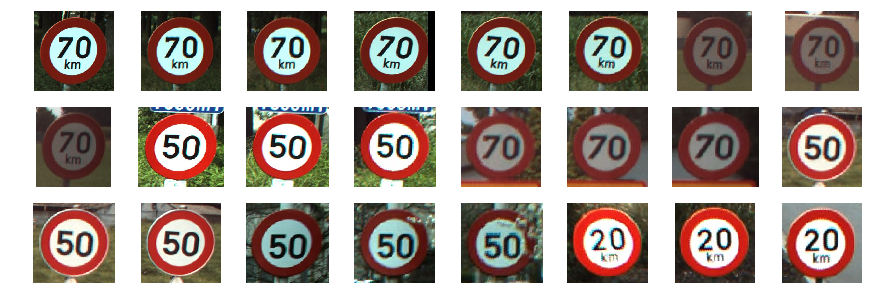

In [16]:
display_label_images(images_train, 32)

In [17]:
for image in images_train[:10]:
    print("shape: {0}, min: {1}, max: {2}".format(image.shape, image.min(), image.max()))

shape: (141, 142, 3), min: 0, max: 255
shape: (120, 123, 3), min: 0, max: 255
shape: (105, 107, 3), min: 0, max: 255
shape: (94, 105, 3), min: 7, max: 255
shape: (128, 139, 3), min: 0, max: 255
shape: (110, 118, 3), min: 8, max: 255
shape: (85, 95, 3), min: 0, max: 255
shape: (180, 193, 3), min: 0, max: 255
shape: (121, 133, 3), min: 0, max: 255
shape: (81, 88, 3), min: 10, max: 255


In [18]:
images_train32 = [skimage.transform.resize(image, (32, 32), mode='constant')
                for image in images_train]

C:\Users\Gurudeo\Anaconda2\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [19]:
images_test32 = [skimage.transform.resize(image, (32, 32), mode='constant')
                for image in images_test]

C:\Users\Gurudeo\Anaconda2\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [20]:
for  image  in  images_train32 [:5]:
    print("shape: {0}, min: {1}, max: {2}".format(image.shape, image.min(), image.max()))

shape: (32, 32, 3), min: 0.0073912377450982, max: 1.0
shape: (32, 32, 3), min: 0.003576899509804572, max: 1.0
shape: (32, 32, 3), min: 0.0015567555147058805, max: 1.0
shape: (32, 32, 3), min: 0.056774662990195915, max: 0.969267003676469
shape: (32, 32, 3), min: 0.026654411764708223, max: 0.9895220588235292


In [21]:
X_train = np.array(images_train32)
X_test=np.array(images_test32)
print("images: ", X_train.shape)
print("images: ", X_test.shape)

images:  (4575, 32, 32, 3)
images:  (2520, 32, 32, 3)


In [22]:
n_classes=62
y_train=np.array(labels_train)
y_train = keras.utils.np_utils.to_categorical(y_train,n_classes)
y_test=np.array(labels_test)
y_test=keras.utils.np_utils.to_categorical(y_test,n_classes)

In [23]:
filters=50
filtersize=(5,5)
epochs =20
batchsize=32
input_shape=(32,32,3)

In [24]:
model2 = Sequential()
model2.add(InputLayer(input_shape=input_shape))

In [25]:
model2.add(keras.layers.convolutional.Conv2D(filters, filtersize, strides=(1, 1), padding='valid', data_format="channels_last", activation='relu'))


In [26]:
model2.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))


In [27]:
model2.add(Dropout(0.2))


In [28]:
model2.add(keras.layers.Flatten())

In [29]:
model2.add(Dense(100, activation='relu'))


In [30]:
model2.add(Dropout(0.3))

In [31]:
model2.add(Dense(units=62,input_dim=100, activation='softmax'))

In [32]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 50)        3800      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 50)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 50)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9800)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               980100    
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
__________

In [34]:
gmodel=model2.fit(X_train, y_train,batch_size=32,epochs=20)

Epoch 1/20
4575/4575 [==============================] - 19s 4ms/step - loss: 2.3859 - acc: 0.4704
Epoch 2/20
4575/4575 [==============================] - 15s 3ms/step - loss: 1.0547 - acc: 0.7397
Epoch 3/20
4575/4575 [==============================] - 16s 3ms/step - loss: 0.5962 - acc: 0.8442
Epoch 4/20
4575/4575 [==============================] - 14s 3ms/step - loss: 0.3919 - acc: 0.8966
Epoch 5/20
4575/4575 [==============================] - 15s 3ms/step - loss: 0.2837 - acc: 0.9211
Epoch 6/20
4575/4575 [==============================] - 14s 3ms/step - loss: 0.2255 - acc: 0.9353
Epoch 7/20
4575/4575 [==============================] - 15s 3ms/step - loss: 0.1883 - acc: 0.9449
Epoch 8/20
4575/4575 [==============================] - 14s 3ms/step - loss: 0.1507 - acc: 0.9593
Epoch 9/20
4575/4575 [==============================] - 15s 3ms/step - loss: 0.1200 - acc: 0.9633
Epoch 10/20
4575/4575 [==============================] - 16s 4ms/step - loss: 0.1199 - acc: 0.9646
Epoch 11/20
4575/45

In [35]:
test_loss, test_accuracy = model2.evaluate(X_test, y_test, batch_size=32)
test_loss, test_accuracy

2520/2520 [==============================] - 3s 1ms/step


(0.21154312447535112, 0.9555555555555556)